# Credit Card Fraud - Jupyter Notebook
# COMPLETED
<br><br>
<b>Notebook objective:</b> build a machine learning fraud detection engine in Python

<h2 style="background-color:yellow; text-align:center"><br>Step 1: Python intro<br></h2>
<br>
To introduce you to coding in Python, you're going to run code that prints "Hello World!"
<br><br>
<mark>Click in the gray cell below and hit Shift + Enter to run the code. If it works, edit the code and re-run it to make it print out your name!</mark>

<br>
<h2 style="background-color:Tomato; text-align:center"><br>Step 2: Loading the dataset<br></h2>
<br><br>
Our dataset, <em>creditcard_data.csv</em> is stored in the folder <em>data</em>, which is in the same folder as this notebook. 
<br>That means the "filepath" from here is <b><em>data/creditcard_data.csv</em></b>.

We need to load that data with Python code into a variable. How do we do that?

With a bit of googling it looks like the easiest way out there is to use a library of pre-written Python code called [PANDAS](https://www.google.com/search?q=load+csv+in+python+with+pandas&oq=load+csv+in+python+with+pandas&aqs=chrome..69i57j0l7.5608j1j9&sourceid=chrome&ie=UTF-8) (Python AND DAta Science) made to make working with data in Python easier.

<mark>Read the code below and try to understand what it is doing (it's ok not to understand every detail). Change INSERT_FILEPATH to the correct filepath and run the code (keep the quotation marks!). If you do it correctly, you will get no error.</mark>

In [2]:
import pandas as pd

data = pd.read_csv("data/creditcard_data.csv", index_col=0)

You have now stored the data inside a variable called <em>data</em>, but we can't see it! Searching online, we can find simple PANDAS code to help us.

<mark>Run <b>data.head(5)</b> in the cell below to see the top (head) 5 rows of the data (feel free to experiment with the number). Scroll left and right to see all the columns.</mark>

In [3]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5871,6398.0,-2.380210,-0.266473,1.090077,0.853215,3.371780,3.790719,-1.123674,0.941963,1.236974,...,-0.306571,-0.514617,-0.443708,0.962374,0.088245,-0.280859,-0.635895,0.616903,0.00,0
225724,144368.0,-0.501770,0.512773,-0.494351,-0.657718,0.695019,0.974452,1.482355,-0.073062,0.074569,...,-0.001963,0.251114,-0.169487,-0.454563,-0.184577,-0.298358,0.042771,0.108608,168.08,0
58321,48330.0,-2.031128,1.253731,1.070599,0.359631,0.434048,-0.799150,1.256107,-1.128289,0.637221,...,0.059160,0.424752,-0.304448,0.413236,0.080387,-0.636258,-2.489246,-0.544980,6.63,0
9236,13291.0,-1.194486,0.917545,1.769059,-0.833028,-0.296318,-0.324340,-0.159088,0.628655,0.774420,...,-0.151858,-0.358540,0.082015,0.180577,-0.488772,0.615896,0.119299,0.061904,10.07,0
13778,24430.0,-1.258770,1.011808,1.134976,-1.716026,0.025043,-1.145037,1.170804,-0.805517,2.517916,...,-0.295435,-0.087037,0.206569,0.362216,-1.164668,0.273269,-0.315072,0.040467,49.08,0


**Notice how many column headers are anonymized (V1, V2 etc..) - this mimics what Mastercard sees in Decision Intelligence. Since our model will learn using correlations, it doesn't need to know what each number represents.**

<mark>Run <b>data.describe()</b> in the cell below to see a summary of the entire dataset. What is the average amount of the transactions in this dataset?</mark>

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,...,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000,179807.000000
mean,94852.147514,-0.008439,0.005504,-0.010693,0.003398,-0.003956,-0.001342,-0.004055,-0.001711,-0.004188,...,-0.000759,0.000299,-0.000854,-0.000885,0.000234,0.000931,0.000379,-0.000530,88.691655,0.002736
std,47511.317469,1.990363,1.672807,1.557383,1.427128,1.408462,1.339708,1.290396,1.227727,1.102470,...,0.747883,0.727345,0.622993,0.605972,0.521215,0.483004,0.408920,0.333813,256.780747,0.052238
min,0.000000,-56.407510,-72.715728,-48.325589,-5.600607,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.836627,-8.696627,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54197.500000,-0.922073,-0.597506,-0.894809,-0.849089,-0.693350,-0.770329,-0.555703,-0.210288,-0.643959,...,-0.228478,-0.543265,-0.162106,-0.355531,-0.316732,-0.326259,-0.071221,-0.053356,5.590000,0.000000
50%,84730.000000,0.013052,0.066827,0.175026,-0.018199,-0.053101,-0.276379,0.040783,0.021903,-0.053196,...,-0.029734,0.007104,-0.011208,0.040260,0.014645,-0.051627,0.001256,0.011036,22.000000,0.000000
75%,139459.000000,1.315338,0.807438,1.028009,0.745151,0.614137,0.400072,0.573418,0.327422,0.596557,...,0.186511,0.531050,0.147933,0.439650,0.349949,0.242213,0.091210,0.078259,77.525000,0.000000
max,172788.000000,2.454930,22.057729,4.226108,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


<mark>While waiting for the facilitator to move on to the next section, discuss the following two questions with your partner:</mark>

1. Our ability to make good predictions depends on the data we use -- what differences might you expect between the model we will make based on this dataset and models built on more recent data?
<br><br>
2. Why do you think it is useful to have anonymized columns?


<br>
<h2 style="background-color:DodgerBlue; text-align:center"><br>Step 3: Building our model<br></h2>
<br>
<b>Mastercard uses a variety of types models to detect fraud. As you know, one of them is decision trees.</b>

Today, we will build a decision tree that is able to predict whether a certain transaction is fraudulent based on the data available to us.

Again, we won't start from scratch; we'll use a data science toolkit called [sklearn](https://scikit-learn.org/stable/modules/tree.html), but we'll need to specify what data we are using as input and which column we want to predict as output.

<mark>Read the code below and try to understand what it is doing. The gray text after "#" are comments - little bits of text to explain the code, they don't do anything. Once you're happy, run the code and hope for no errors!</mark> 

In [5]:
from sklearn import tree

# Use all data except the 'Class' column as input
X = data.drop('Class', axis=1)
# Use the 'Class' column as what we want to predict as output
y = data['Class']

# Create an empty model 
model = tree.DecisionTreeClassifier()

# Fit the model to our data
model = model.fit(X, y)

<br>
<h2 style="background-color:MediumSeaGreen; text-align:center"><br>Step 4: Evaluating our model<br></h2>
<br>

We've built our tree -- now let's test it.

<mark>In the cell below, use **model.score(X, y)** to evaluate the accuracy of our tree using our input and output data.</mark>

In [6]:
model.score(X, y)

1.0

Accuracy ranges between 0.0 (it predicted every transaction wrong) to 1.0 (it predicted every transaction right).

<mark>Look at your accuracy and discuss with your partner: is it possible to be too accurate?</mark>

## Model iteration

Just like much of writing is reading and re-writing, when data scientists test their models, they analyze the results and re-build the models.

<mark>Run the code below to split the data into training X and y and test X and Y</mark>



In [7]:
from sklearn.model_selection import train_test_split

# Split X and y (our input and outputs) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

Below is the code we used to build the model before.

<mark>Modify and run it to use your training and testing datasets.</mark>

In [8]:
model = tree.DecisionTreeClassifier()
model = model.fit(X, y)
model.score(X, y)

1.0

Again, what might explain the accuracy score of your model?

<mark>Run the code below and interpret the results. What problem is this showing?</mark>

0    179315
1       492
Name: Class, dtype: int64


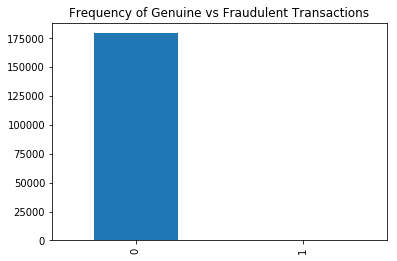

In [9]:
counts = pd.value_counts(data["Class"])

%matplotlib inline
print(counts)
counts.plot(kind="bar",
           title="Frequency of Genuine vs Fraudulent Transactions")

Why is this a problem?

## Transforming the data

**Data scientists make choices that impact model outputs. At Mastercard, data scientists are dealing with the same challenge: trying to reduce fraud based on limited datasets.**

To deal with the uneven number of fraud and genuine transactions, we could artificially increase the number of fraud transactions by creating similar transactions, or we could reduce the number of genuine transactions.

With more time, we might test multiple strategies. Today we'll reduce the number of genuine transactions.

<mark>Run the code, and look at the mean of the Class column. What does it mean? Modify number_genuine to change the number of genuine transactions that balance the classes, and re-run the code.</mark>

In [13]:
# How many genuine transactions should we use to balance the classes?
number_genuine = 400

# Separate genuine transactions and fraud
genuine = data[data["Class"] == 0].sample(number_genuine)
fraud = data[data["Class"] == 1]

# Combine fraud and genuine
even_data = pd.concat([genuine, fraud])

# Summarize our new dataset, even_data
even_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,...,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000
mean,88048.544843,-2.655489,1.947152,-3.867982,2.463906,-1.755181,-0.756759,-3.103884,0.332961,-1.423785,...,0.421438,0.015942,-0.012490,-0.056612,0.034946,0.021581,0.095255,0.042606,112.389339,0.551570
std,48019.297813,5.720092,3.853739,6.426729,3.258244,4.383875,1.788399,6.060131,5.115814,2.374466,...,2.954261,1.222123,1.221141,0.561522,0.707715,0.473788,1.042642,0.434326,264.969145,0.497612
min,406.000000,-30.552380,-10.544654,-31.103685,-3.551914,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.789614,-4.781606,-1.154787,-7.263482,-1.869290,0.000000,0.000000
25%,45872.500000,-3.365278,-0.156756,-5.471081,-0.002538,-2.032046,-1.729937,-3.491812,-0.177945,-2.504370,...,-0.165312,-0.541429,-0.262848,-0.400890,-0.322323,-0.290680,-0.067133,-0.054593,1.000000,0.000000
50%,81704.000000,-0.944678,1.038291,-1.635551,1.659596,-0.586127,-0.735802,-0.856290,0.206352,-0.886668,...,0.207069,0.030671,-0.033986,0.004740,0.079328,-0.026232,0.055824,0.040354,17.770000,1.000000
75%,133787.750000,0.929603,3.135188,0.206641,4.525494,0.457858,0.076678,0.210396,0.980973,0.116944,...,0.764206,0.614759,0.217358,0.365020,0.443556,0.322613,0.486462,0.241750,99.990000,1.000000
max,172708.000000,2.331749,22.057729,3.139198,12.114672,11.095089,6.474115,5.802537,20.007208,6.002481,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,3167.740000,1.000000


Since we have a new dataset, we'll need to recreate our inputs, outputs, and split them into training and testing sets.

In [19]:
# Create inputs and outputs with new dataset
X = even_data.drop('Class', axis=1)
y = even_data['Class']

# Split new inputs and outputs into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

# Train and score decision tree using new data
model = tree.DecisionTreeClassifier(max_depth = 4)
model = model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9253731343283582

The last step is to visualize the decision tree we made. To do this, we've copied some code from the sklearn documentation.

<mark>Run the code below to see your tree!</mark>

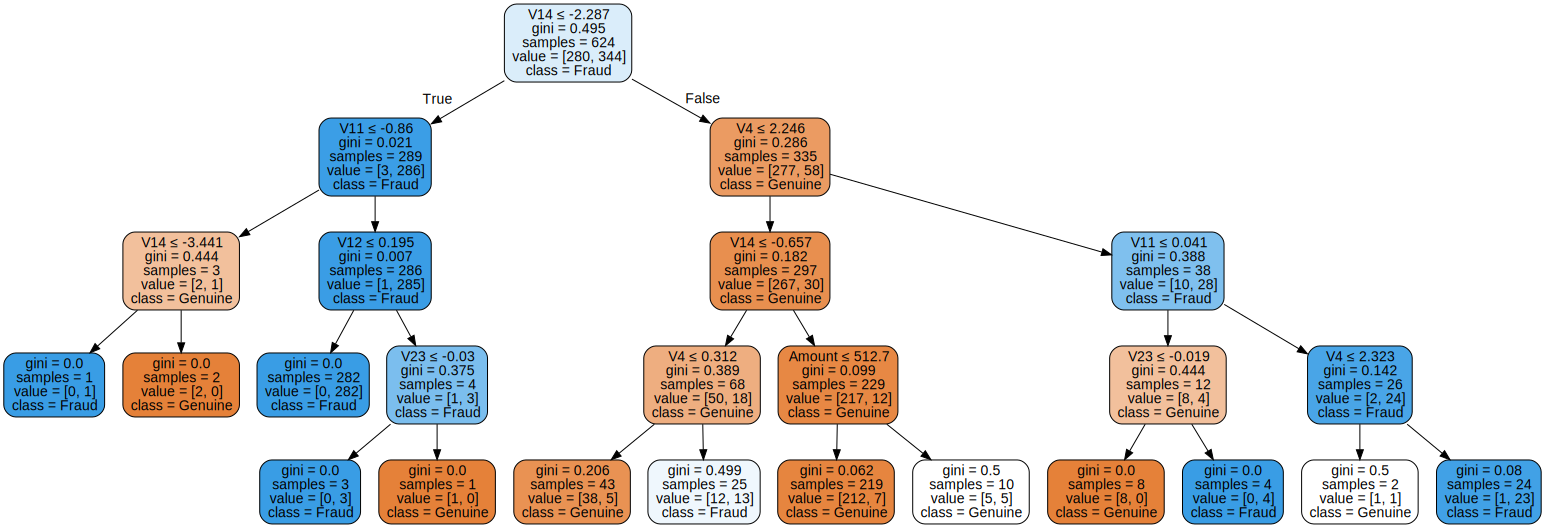

In [20]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=X.columns.values,  
                     class_names=["Genuine","Fraud"],  
                     filled=True, rounded=True, 
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

You might notice your decision tree is very small. The final step is to evaluate how complex your decision tree needs to be.

<mark>Go back <b>two</b> code cells and change the max_depth of your decsion tree (line 9). Run the code, then re-run the code to visualize the tree</mark>

<mark>What size of decision tree gets the greatest accuracy for your data? Why?</mark>